In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import numpy as np
import sys
sys.path.append("..")
from src import *

will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.


/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:33: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:33: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:33: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/graph_tool/all.py:39: RuntimeWarning: Error importing draw module, proceeding nevertheless: No module named 'cairo'
  warnings.warn(msg, RuntimeWarning)


In [9]:
adata = sc.datasets.ebi_expression_atlas(accession="E-MTAB-9221")

In [10]:
adata.obs["Factor Value[sampling time point]"]

SAMEA6979313-AAACCCAAGACTCAAA     0 day
SAMEA6979313-AAAGAACCACCTGCTT     0 day
SAMEA6979313-AAAGGATGTCCCTCAT     0 day
SAMEA6979313-AAAGGGTGTCCCTCAT     0 day
SAMEA6979313-AAAGGTTGTCCCTCAT     0 day
                                  ...  
SAMEA6979322-TTTCCTCTCAACCTCC    17 day
SAMEA6979322-TTTCGATAGATTAGAC    17 day
SAMEA6979322-TTTGATCCAATAGTGA    17 day
SAMEA6979322-TTTGGTTAGAATTGTG    17 day
SAMEA6979322-TTTGGTTCATTGTGCA    17 day
Name: Factor Value[sampling time point], Length: 6807, dtype: category
Categories (3, object): ['0 day', '10 day', '17 day']

In [11]:
adata = adata[adata.obs["Factor Value[inferred cell type - ontology labels]"] == "T cell"]
adata = adata[adata.obs["Factor Value[sampling time point]"] == "0 day"]

In [12]:
adata

View of AnnData object with n_obs × n_vars = 1658 × 20522
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[clinical history]', 'Sample Characteristic Ontology Term[clinical history]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Factor Value[disease]', 'Factor Value Ontology Term[disease]', 'Factor Value[clinical history]', 'Factor Value Ontology Term[clinical history]', 'Factor Value[sampling time point]', 'Factor Value Ontology Term[sampling time point]

In [13]:
sc.pp.log1p(adata)  # Logarithmize the data
sc.pp.highly_variable_genes(adata, n_top_genes=2000)  # Select top 2000 variable genes
adata = adata[:, adata.var.highly_variable]  # Subset to variable genes

/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/scanpy/preprocessing/_simple.py:408: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/data/bionets/je30bery/singularity/gt/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


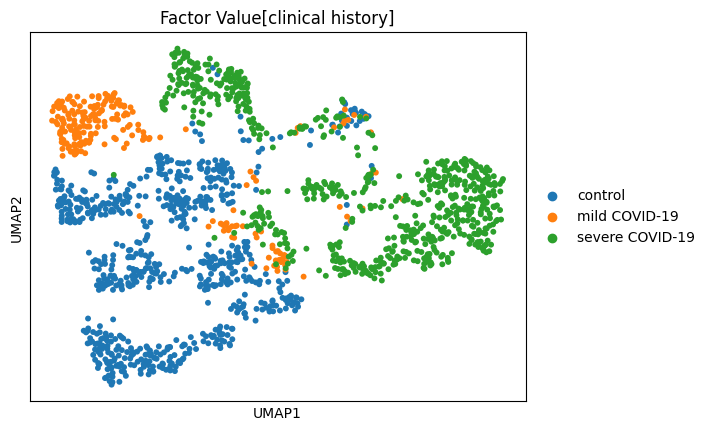

In [15]:
sc.pl.umap(adata, color="Factor Value[clinical history]")

In [17]:
rosenbaum(adata, group_by="Factor Value[clinical history]", test_group='severe COVID-19', reference="control", rank=False)

/mnt/je30bery/rosenbaum_test/notebooks/../src/rosenbaum.py:153: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


XMatch_group
reference    748
test         679
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 1428 samples
counting cross matches.


(8.746420231569778e-175, np.float64(-25.135557310961232), 1.0)

In [ ]:
for c in adata.obs.columns:
    print(c)
    print(np.unique(adata.obs[c].astype(str)))
    print()

In [ ]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)  # Replace 'louvain' with desired cluster or metadata field
sc.pl.umap(adata, color="Factor Value[clinical history]")  # Replace 'louvain' with desired cluster or metadata field

In [ ]:
adata.obs["Factor Value[clinical history]"]